In [28]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [29]:
data_ALL = pd.read_csv("current_csv_files/data_ALL.csv")
test_ALL = pd.read_csv("current_csv_files/test_ALL.csv")

data_A = data_ALL[data_ALL['A'] == 1]
data_B = data_ALL[data_ALL['B'] == 1]
data_C = data_ALL[data_ALL['C'] == 1]


data_FULL = pd.concat([data_ALL, test_ALL], ignore_index=True)
data_FULL_A = data_FULL[data_FULL['A'] == 1]
data_FULL_B = data_FULL[data_FULL['B'] == 1]
data_FULL_C = data_FULL[data_FULL['C'] == 1]


In [30]:
# Fit the SARIMAX model to full dataset
exog_vars = ['direct_rad:W', 'diffuse_rad:W']

In [31]:
sarimax_model_A = SARIMAX(data_A['target'],
                        exog=data_A[exog_vars],
                        order=(1, 0, 1),
                        seasonal_order=(2, 1, 1, 24))
sarimax_results_A = sarimax_model_A.fit()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


KeyboardInterrupt: 

In [ ]:
pred_A = sarimax_results_A.forecast(steps=len(data_FULL_A), exog=data_FULL_A[exog_vars])
pred_A_clip = pred_A.clip(lower=0)
pred_A_clip.to_csv("current_csv_files/sarima_A.csv")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [20]:
len(pred_A), len(data_FULL_A)

(33926, 33926)

In [23]:
plt.plot(data_A["target"].iloc[0:], color='blue')
plt.plot(pred_A_clip.iloc[0:], color='green')
plt.show()

KeyboardInterrupt: 

In [5]:
sarimax_model_B = SARIMAX(data_B['target'],
                        exog=data_B[exog_vars],
                        order=(1, 0, 1),
                        seasonal_order=(2, 1, 1, 24))
sarimax_results_B = sarimax_model_B.fit()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.61503D+00    |proj g|=  6.22382D-02


 This problem is unconstrained.



At iterate    5    f=  5.57538D+00    |proj g|=  3.01066D-02

At iterate   10    f=  5.56046D+00    |proj g|=  8.12226D-03

At iterate   15    f=  5.55597D+00    |proj g|=  7.41647D-03

At iterate   20    f=  5.51905D+00    |proj g|=  5.46417D-02

At iterate   25    f=  5.50461D+00    |proj g|=  3.12141D-03

At iterate   30    f=  5.50459D+00    |proj g|=  1.09128D-03
  ys=-9.239E-04  -gs= 9.195E-04 BFGS update SKIPPED

At iterate   35    f=  5.49898D+00    |proj g|=  3.54912D-02

At iterate   40    f=  5.49018D+00    |proj g|=  1.03635D-02

At iterate   45    f=  5.48927D+00    |proj g|=  1.99546D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  

: 

In [ ]:
sarimax_model_C = SARIMAX(data_C['target'],
                        exog=data_C[exog_vars],
                        order=(1, 0, 1),
                        seasonal_order=(2, 1, 1, 24))
sarimax_results_C = sarimax_model_C.fit()

In [ ]:
best_model = sarimax_model
best_result = best_model.get_forecast(steps=len(All_A), exog=All_A[best_exog_vars])
best_mean = best_result.predicted_mean
best_mean_clip = best_mean.clip(lower=0)
best_conf = best_result.conf_int()

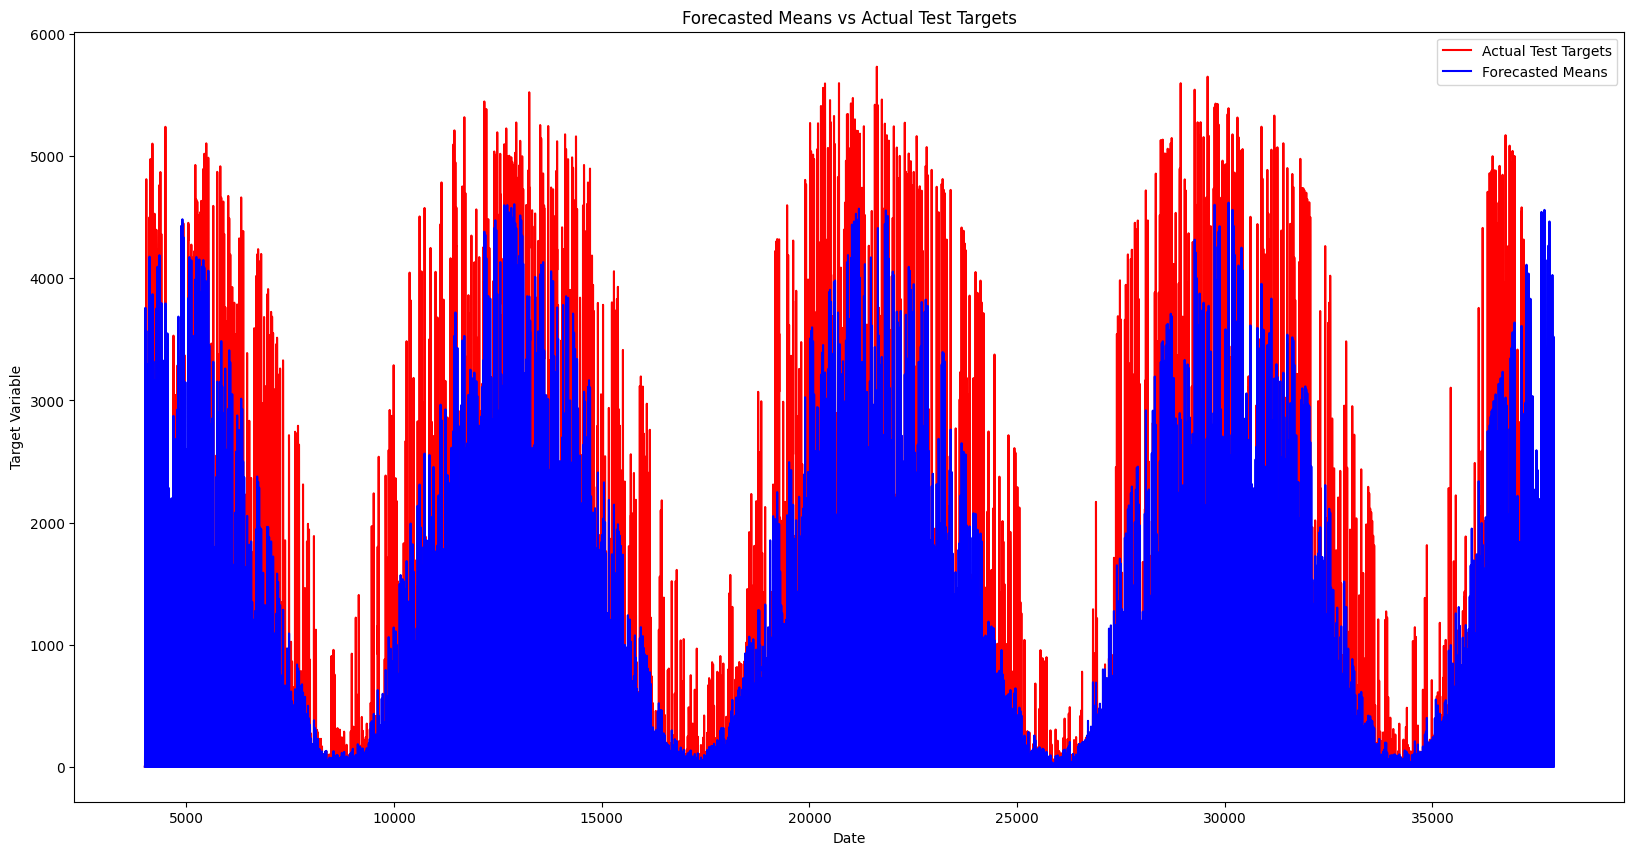

In [62]:
plt.figure(figsize=(20, 10))

"""
N = 0
start = N + 0
end = start + 10000

# Plot the actual test targets
plt.plot(best_mean.iloc[start:end].index, All_A.iloc[start:end]['target'], color='red', label='Actual Test Targets')

# Plot the forecasted means
plt.plot(best_mean.iloc[start:end].index, best_mean.iloc[start:end], color='blue', label='Forecasted Means')
"""

plt.plot(best_mean_clip.index, All_A['target'], color='red', label='Actual Test Targets')

plt.plot(best_mean_clip.index, best_mean_clip, color='blue', label='Forecasted Means')


# Plot the confidence intervals
"""
plt.fill_between(best_mean.index, 
                 best_conf.iloc[:, 0], 
                 best_conf.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
"""




# Customizing the plot
plt.title('Forecasted Means vs Actual Test Targets')
plt.xlabel('Date')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

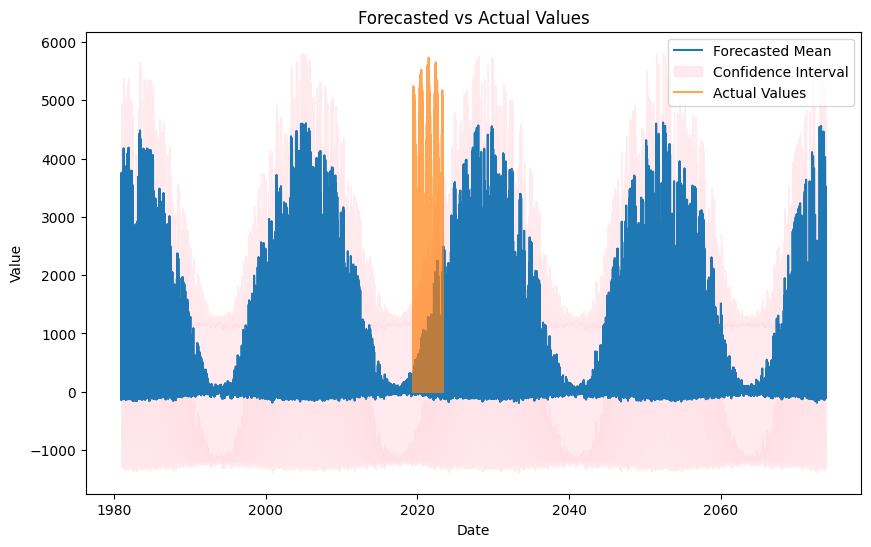

In [52]:
plt.figure(figsize=(10, 6))

# Plot the forecasted mean
plt.plot(best_mean.index, best_mean, label='Forecasted Mean')

# Plot the confidence intervals
plt.fill_between(best_conf.index, 
                 best_conf.iloc[:, 0], 
                 best_conf.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')

# Plot the actual values
plt.plot(All_A['target'].index, All_A['target'], label='Actual Values', alpha=0.7)

# Customize the plot
plt.title('Forecasted vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()